In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dataset:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


this the dataset having 614 rows and 13 columns. data includes both object and numerical data. loan status is our target variable.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we have toatal 8 features having object data.

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

here we can see our dataset have null values. according  to categorical and continous data we will have to replace the null values.

In [7]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

Loan_ID:['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

# DATA VISIUVALIZATION:

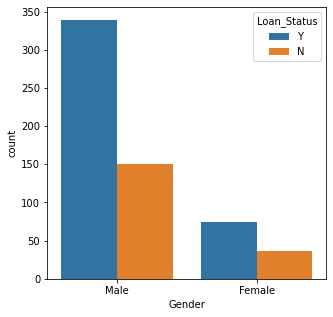

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(df['Gender'], hue=df['Loan_Status'])
plt.show()

male customers are high having loan status as yes.

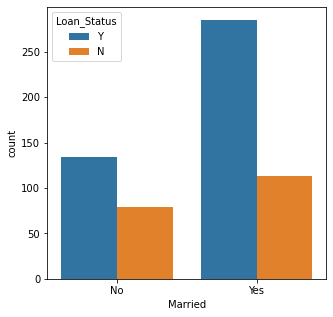

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(df['Married'], hue=df['Loan_Status'])
plt.show()

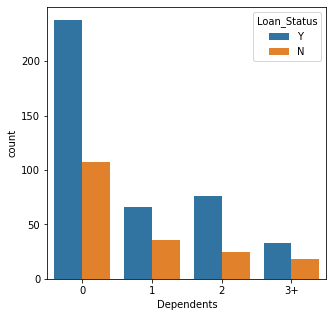

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(df['Dependents'], hue=df['Loan_Status'])
plt.show()

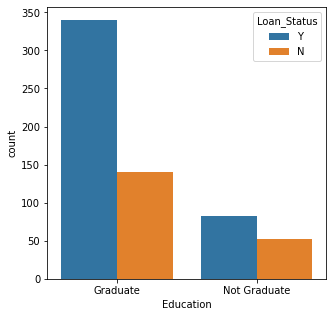

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(df['Education'], hue=df['Loan_Status'])
plt.show()

here i can see graduate pepole have loan status yes more than not graduate

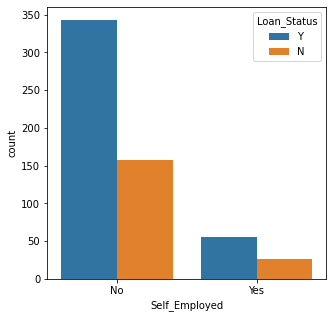

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(df['Self_Employed'], hue=df['Loan_Status'])
plt.show()

pepole's which are self employed are not getting loan as compared to non self employed 

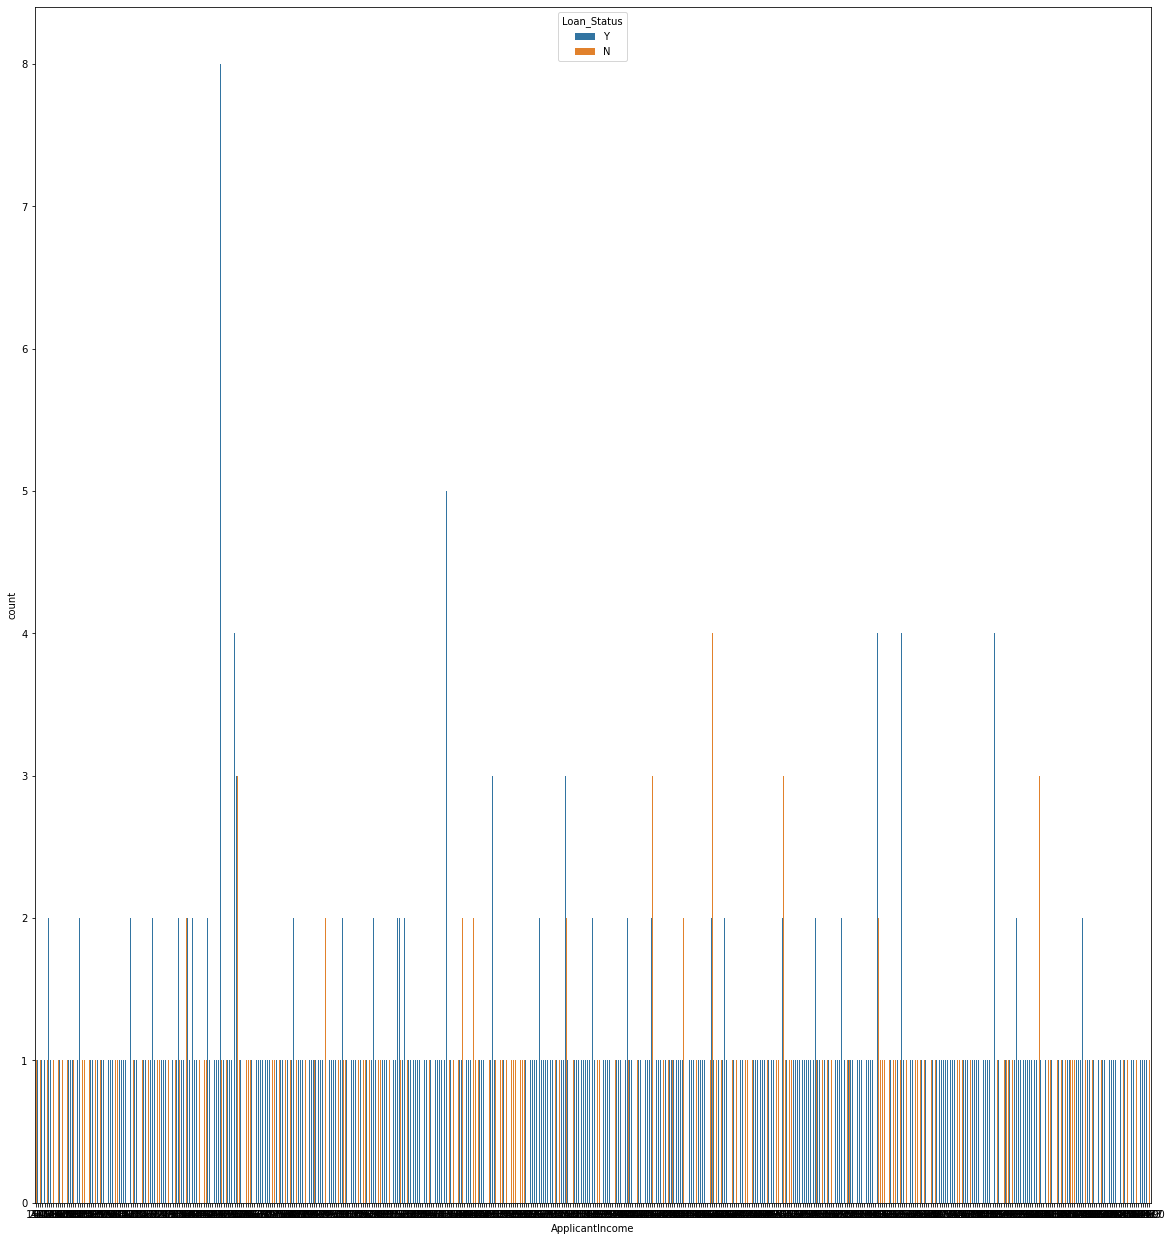

In [13]:
plt.figure(figsize=(20,22))
sns.countplot(df['ApplicantIncome'], hue=df['Loan_Status'])
plt.show()

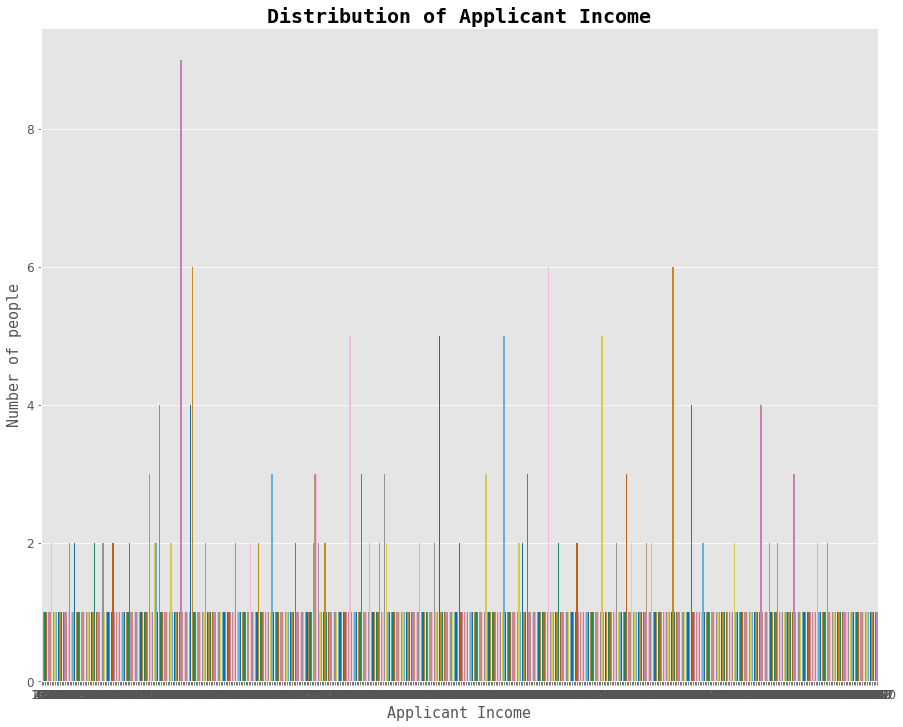

In [14]:
income_num = df['ApplicantIncome'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(15, 12))
sns.barplot(income_num.index, income_num.values, palette='colorblind')
plt.title('Distribution of Applicant Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Applicant Income', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

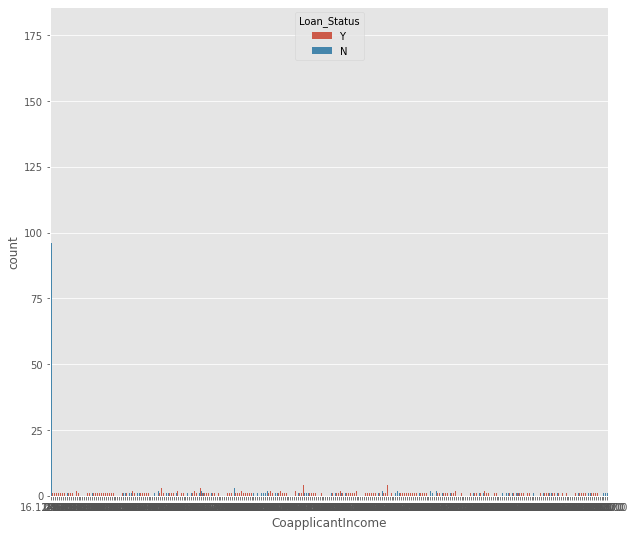

In [15]:
plt.figure(figsize=(10,9))
sns.countplot(df['CoapplicantIncome'], hue=df['Loan_Status'])
plt.show()

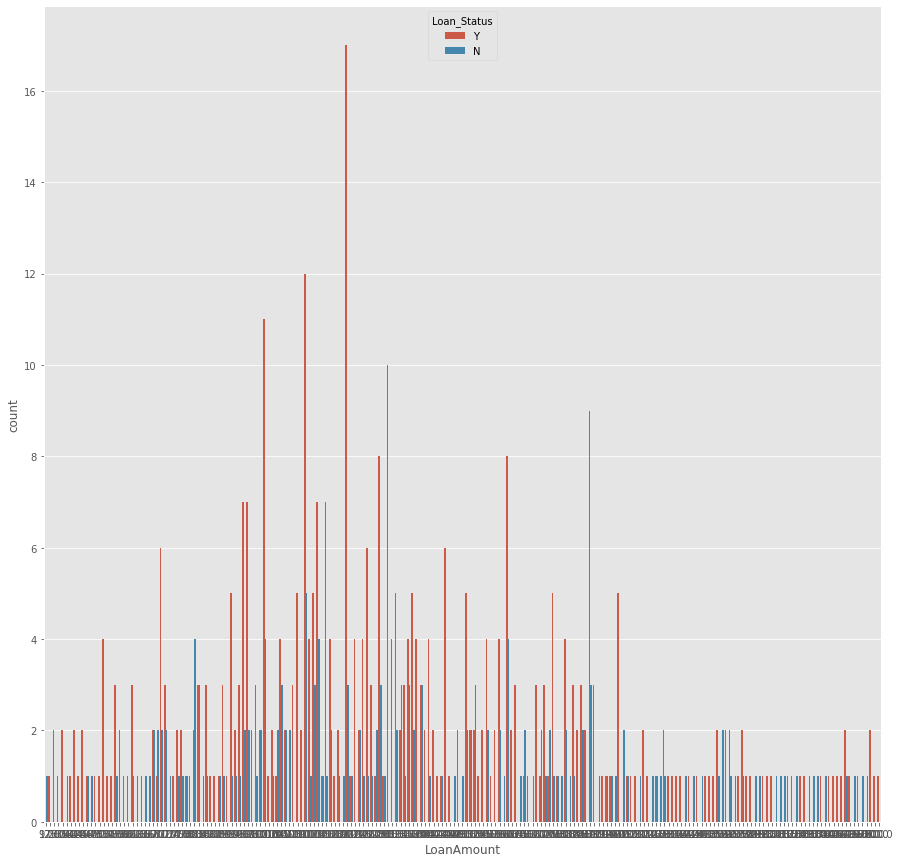

In [16]:
plt.figure(figsize=(15,15))
sns.countplot(df['LoanAmount'], hue=df['Loan_Status'])
plt.show()

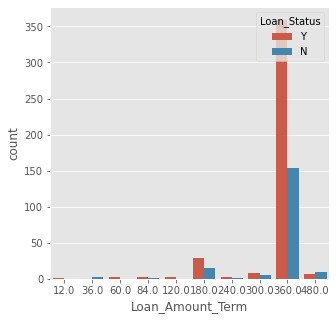

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(df['Loan_Amount_Term'], hue=df['Loan_Status'])
plt.show()

applicant's loan term 360 have loan status approved as yes

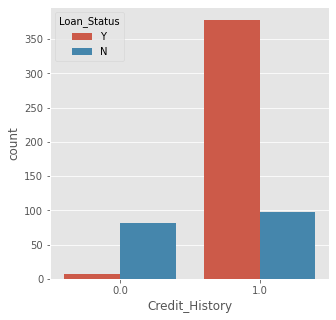

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(df['Credit_History'], hue=df['Loan_Status'])
plt.show()

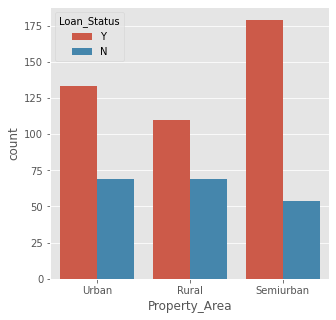

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(df['Property_Area'], hue=df['Loan_Status'])
plt.show()

applicants from semiurban and urban areas have loan status yes than rural.

In [20]:
df = df.drop(['Loan_ID'],axis=1)

In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


loan id is not important feature while predicating the status. as its just a id so i have dropped the column.

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


here i have converted object data into numerical using labelencoder.

In [25]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )

In [26]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

here I have filled null values with some meaningful data using mean and mode. now our dataset does not have any null value.

# skewness:

In [27]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

skewness is present in applicant income,copplicant income,loan amount. So here I am using Log method to the specified columns to remove the skewness.

In [28]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['LoanAmount'] = np.log(df['LoanAmount'])

In [29]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount          -0.223227
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Outliers:

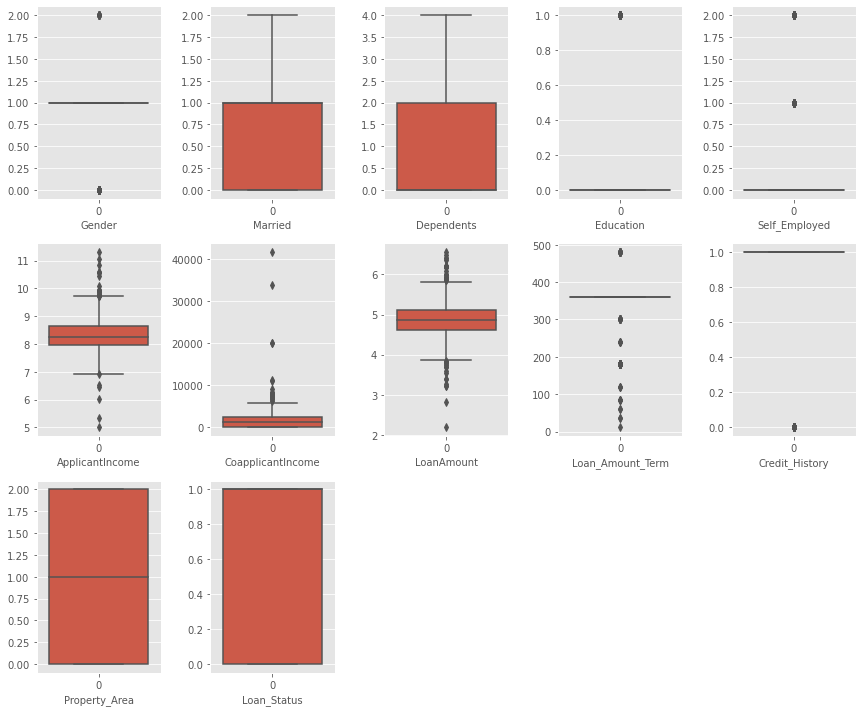

In [31]:
plt.figure(figsize =(12,10),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize =10)

    plotnumber+=1
plt.tight_layout()

I will remove outliers only for the column which have continuos data like - applicant income,coapplicant income and loan amount.

In [32]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3-q1

In [33]:
income_high = (q3.ApplicantIncome + (1.5 *iqr.ApplicantIncome))
income_high

outliers1 = np.where(df['ApplicantIncome'] > income_high)
df = df.drop(df.index[outliers1])
print(df.shape)
df.reset_index()

(593, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.674026,0.0,4.986426,360.0,1.0,2,1
1,1,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
2,2,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2,1
3,3,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
4,4,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,609,0,0,0,0,0,7.972466,0.0,4.262680,360.0,1.0,0,1
589,610,1,1,3,0,0,8.320205,0.0,3.688879,180.0,1.0,0,1
590,611,1,1,1,0,0,8.996157,240.0,5.533389,360.0,1.0,2,1
591,612,1,1,2,0,0,8.933664,0.0,5.231109,360.0,1.0,2,1


In [34]:
co_income_high = (q3.CoapplicantIncome + (1.5 *iqr.CoapplicantIncome))
co_income_high

outliers2 = np.where(df['CoapplicantIncome'] > co_income_high)
df = df.drop(df.index[outliers2])
print(df.shape)
df.reset_index()

(576, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.674026,0.0,4.986426,360.0,1.0,2,1
1,1,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
2,2,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2,1
3,3,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
4,4,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,609,0,0,0,0,0,7.972466,0.0,4.262680,360.0,1.0,0,1
572,610,1,1,3,0,0,8.320205,0.0,3.688879,180.0,1.0,0,1
573,611,1,1,1,0,0,8.996157,240.0,5.533389,360.0,1.0,2,1
574,612,1,1,2,0,0,8.933664,0.0,5.231109,360.0,1.0,2,1


In [35]:
loan_high = (q3.LoanAmount  + (1.5 *iqr.LoanAmount ))
loan_high

outliers3 = np.where(df['LoanAmount'] > loan_high)
df = df.drop(df.index[outliers3])
print(df.shape)
df.reset_index()

(572, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.674026,0.0,4.986426,360.0,1.0,2,1
1,1,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
2,2,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2,1
3,3,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
4,4,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,609,0,0,0,0,0,7.972466,0.0,4.262680,360.0,1.0,0,1
568,610,1,1,3,0,0,8.320205,0.0,3.688879,180.0,1.0,0,1
569,611,1,1,1,0,0,8.996157,240.0,5.533389,360.0,1.0,2,1
570,612,1,1,2,0,0,8.933664,0.0,5.231109,360.0,1.0,2,1


here I have removed all outliers now our data is clean to train.

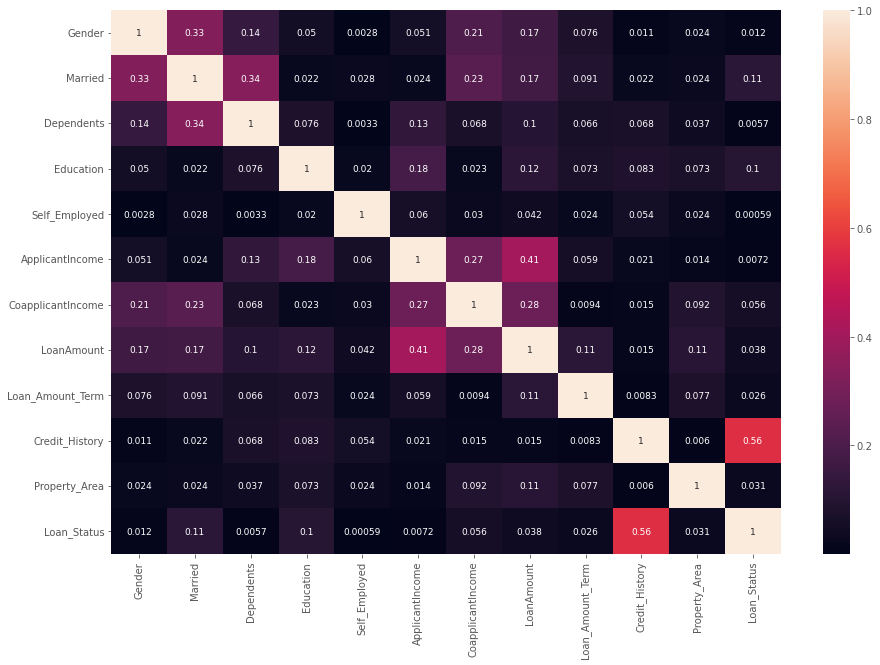

In [36]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()

from above corelation heatmap I can say that credit_history is highly corealted with target variable.self employed is almost not corelated with target variable. also I can see our data does not exist multicolinearity. I will drop self employed while training the model as its not useful.

In [37]:
X = df.drop(['Loan_Status','Self_Employed'],axis=1)
X

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,8.674026,0.0,4.986426,360.0,1.0,2
1,1,1,1,0,8.430109,1508.0,4.852030,360.0,1.0,0
2,1,1,0,0,8.006368,0.0,4.189655,360.0,1.0,2
3,1,1,0,1,7.856707,2358.0,4.787492,360.0,1.0,2
4,1,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,7.972466,0.0,4.262680,360.0,1.0,0
610,1,1,3,0,8.320205,0.0,3.688879,180.0,1.0,0
611,1,1,1,0,8.996157,240.0,5.533389,360.0,1.0,2
612,1,1,2,0,8.933664,0.0,5.231109,360.0,1.0,2


In [38]:
y= df['Loan_Status']

balancing target variable count:

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
SMOTE()

SMOTE()

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y)

In [43]:
from collections import Counter
ove_smp = SMOTE(0.75)
x_train_s,y_train_s = ove_smp.fit_resample(x_train,y_train)
print('the number of the classes before fit {}'.format(Counter(y_train)))
print('the number of the classes after fit {}'.format(Counter(y_train_s)))

the number of the classes before fit Counter({1: 294, 0: 135})
the number of the classes after fit Counter({1: 294, 0: 220})


# TRAINING AND TESTING

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)
   

accuracy 0.808695652173913 random_state 0
accuracy 0.808695652173913 random_state 0
accuracy 0.8260869565217391 random_state 1
accuracy 0.8260869565217391 random_state 1
accuracy 0.782608695652174 random_state 2
accuracy 0.808695652173913 random_state 3
accuracy 0.7739130434782608 random_state 4
accuracy 0.8260869565217391 random_state 5
accuracy 0.782608695652174 random_state 6
accuracy 0.808695652173913 random_state 7
accuracy 0.808695652173913 random_state 8
accuracy 0.8173913043478261 random_state 9
accuracy 0.8608695652173913 random_state 10
accuracy 0.8608695652173913 random_state 10
accuracy 0.8521739130434782 random_state 11
accuracy 0.8608695652173913 random_state 12
accuracy 0.8782608695652174 random_state 13
accuracy 0.8782608695652174 random_state 13
accuracy 0.7739130434782608 random_state 14
accuracy 0.808695652173913 random_state 15
accuracy 0.808695652173913 random_state 16
accuracy 0.8434782608695652 random_state 17
accuracy 0.7217391304347827 random_state 18
accuracy 

In [46]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.8956521739130435 Random State 151


In [47]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state =151,test_size = 0.20)


In [48]:
lr.fit(x_train,y_train)

LogisticRegression()

In [49]:
pred_test = lr.predict(x_test)

In [51]:
print(accuracy_score(y_test,pred_test))

0.8956521739130435


In [52]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        33
           1       0.87      1.00      0.93        82

    accuracy                           0.90       115
   macro avg       0.94      0.82      0.85       115
weighted avg       0.91      0.90      0.89       115



In [53]:
print(confusion_matrix(y_test,pred_test))

[[21 12]
 [ 0 82]]


In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(confusion_matrix(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.808695652173913
[[26  7]
 [15 67]]
              precision    recall  f1-score   support

           0       0.63      0.79      0.70        33
           1       0.91      0.82      0.86        82

    accuracy                           0.81       115
   macro avg       0.77      0.80      0.78       115
weighted avg       0.83      0.81      0.81       115



In [55]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(confusion_matrix(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 0.8869565217391304
[[21 12]
 [ 1 81]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.76        33
           1       0.87      0.99      0.93        82

    accuracy                           0.89       115
   macro avg       0.91      0.81      0.84       115
weighted avg       0.89      0.89      0.88       115



In [56]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(confusion_matrix(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 0.8956521739130435
[[21 12]
 [ 0 82]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        33
           1       0.87      1.00      0.93        82

    accuracy                           0.90       115
   macro avg       0.94      0.82      0.85       115
weighted avg       0.91      0.90      0.89       115



In [57]:
from sklearn.ensemble import AdaBoostClassifier

at = AdaBoostClassifier()
at.fit(x_train,y_train)
preat = at.predict(x_test)
print('Accuracy',accuracy_score(y_test,preat))
print(confusion_matrix(y_test,preat))
print(classification_report(y_test,preat))


Accuracy 0.8695652173913043
[[22 11]
 [ 4 78]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75        33
           1       0.88      0.95      0.91        82

    accuracy                           0.87       115
   macro avg       0.86      0.81      0.83       115
weighted avg       0.87      0.87      0.86       115



In [58]:
from sklearn.ensemble import BaggingClassifier

bt = BaggingClassifier()
bt.fit(x_train,y_train)
prebt = bt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prebt))
print(confusion_matrix(y_test,prebt))
print(classification_report(y_test,prebt))


Accuracy 0.8
[[22 11]
 [12 70]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        33
           1       0.86      0.85      0.86        82

    accuracy                           0.80       115
   macro avg       0.76      0.76      0.76       115
weighted avg       0.80      0.80      0.80       115



In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prekt = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prekt))
print(confusion_matrix(y_test,prekt))
print(classification_report(y_test,prekt))


Accuracy 0.8695652173913043
[[20 13]
 [ 2 80]]
              precision    recall  f1-score   support

           0       0.91      0.61      0.73        33
           1       0.86      0.98      0.91        82

    accuracy                           0.87       115
   macro avg       0.88      0.79      0.82       115
weighted avg       0.87      0.87      0.86       115



In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
prext = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prext))
print(confusion_matrix(y_test,prext))
print(classification_report(y_test,prext))


Accuracy 0.8695652173913043
[[20 13]
 [ 2 80]]
              precision    recall  f1-score   support

           0       0.91      0.61      0.73        33
           1       0.86      0.98      0.91        82

    accuracy                           0.87       115
   macro avg       0.88      0.79      0.82       115
weighted avg       0.87      0.87      0.86       115



from all the above model's observations I can see that Logistic Regression and SVC are giving high accuracy which is 89%. and both are giving same confusion matrix report true negetive rate is 0 for both models. now i will check the cross validation score for this two models.

# CROSS VALIDATION

In [61]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X_scaled,y,cv=3)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 0.818232754661523


In [62]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(st,X_scaled,y,cv=3)
print("Cross Validation Score for SVC Model is:-",scr.mean())

Cross Validation Score for SVC Model is:- 0.8182235693946908


Both models are giving same cross validation score. Now I will apply hyperparameter tuning

# HyperPatameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,0.01,0.1,0.002,0.2],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

In [66]:
GCV = GridSearchCV(LogisticRegression(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [67]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [68]:
GCV.best_estimator_

LogisticRegression(C=0.001, solver='liblinear')

In [69]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8956521739130435

<function matplotlib.pyplot.show(close=None, block=None)>

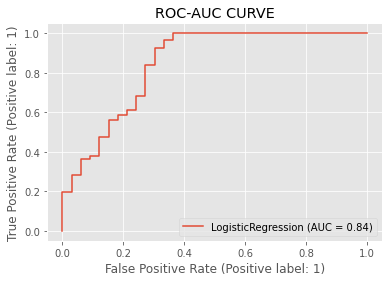

In [70]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

after applying hyperparameter tuning model giving the same accucy for Logistic Regression and  I have plotted here AUC ROC curve which is showing area under the curve is 84%. Now lets apply same on SVC and check the score.

In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.001,0.01,0.1,0.002,0.2]}
              

In [83]:
GCV2 = GridSearchCV(SVC(),parameters,cv=5,scoring='accuracy')
GCV2.fit(x_train,y_train)
GCV2.best_params_

{'C': 0.2}

In [84]:
type(GCV2)

sklearn.model_selection._search.GridSearchCV

In [85]:
GCV2.best_estimator_

SVC(C=0.2)

In [86]:
GCV2_pred = GCV2.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV2_pred)

0.8782608695652174

<function matplotlib.pyplot.show(close=None, block=None)>

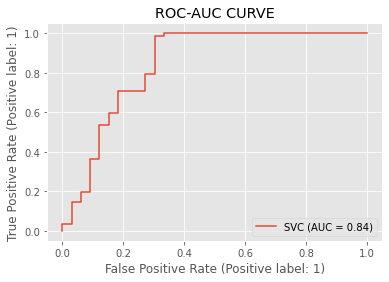

In [87]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV2.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

here its giving 87% accuracy and  same area under the curve 84%, so I am finalising Logistic Regression as my final model and saving it.

In [89]:
import joblib
joblib.dump(GCV.best_estimator_,'loan application status model.pkl')

['loan application status model.pkl']